<a href="https://colab.research.google.com/github/01aleem/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.duplicated().sum()

31994

In [8]:
# we can see above that there are a large amount of duplicated values
# although as there are no unique values in the row, such as a booking ID, which means that these could be genuine entries
# However, being similar on every parameter is highly unlikely
# Hence we will drop the duplicates

df= df.drop_duplicates()

In [9]:
df.shape

(87396, 32)

In [10]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
from datetime import datetime

In [13]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: datetime.strptime(x, '%B'))

In [14]:
df['arrival_date_month'].unique()

array(['1900-07-01T00:00:00.000000000', '1900-08-01T00:00:00.000000000',
       '1900-09-01T00:00:00.000000000', '1900-10-01T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-12-01T00:00:00.000000000',
       '1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', '1900-04-01T00:00:00.000000000',
       '1900-05-01T00:00:00.000000000', '1900-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [15]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: x.month)

In [16]:
df['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [17]:
df['date'] = df["arrival_date_day_of_month"].astype(str) + '-' + df["arrival_date_month"].astype(str) + '-' + df["arrival_date_year"].astype(str)

In [18]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [19]:
df.rename(columns = {'is_canceled':'canceled', 'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_week_number':'week_of_month',
                     'is_repeated_guest': 'repeated_guest'}, inplace = True)

In [20]:
df.drop(columns = ['week_of_month'], inplace = True)

In [21]:
df['children'] = df['children'].fillna(0)

In [22]:
df['children'] = df['children'].astype('int')

In [23]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [24]:
# the reservation status column already accounts for cancelations, hence we can drop the column 'canceled'.
# Also the column 'canceled' includes no-shows as well, but treat them as under the umbrella of canceled, which is differentiated in reservation status column 

df.drop(columns = ['canceled'], inplace = True)

In [25]:
# the date column has been created, there is no need for a column for days of the month

df.drop(columns = ['arrival_date_day_of_month'], inplace = True)

In [26]:
df['reservation_status_date'] = df['reservation_status_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [27]:
# we drop the agents column as it does not provide any valueable insights

df.drop(columns = ['agent'], inplace = True)

In [28]:
df['company'].isnull().sum()*100 / df.shape[0]

93.98256213098998

In [29]:
df.drop(columns = ['company'], inplace = True)

In [30]:
df.rename(columns = {'total_of_special_requests':'special_requests', 'required_car_parking_spaces':'car_parks_required'}, inplace = True)

In [31]:
df.drop(columns = ['adr'], inplace = True)

In [32]:
df.rename(columns = {'previous_bookings_not_canceled':'previous_stays'}, inplace = True)

In [33]:
# nan values for country is less than 5%, it can be dropped

df = df.dropna(axis = 0)

In [34]:
df.year.unique()

array([2015, 2016, 2017])

In [35]:
df['kids'] = df.children + df.babies

In [36]:
no_kids_df = df[df['kids'] == 0]

In [37]:
with_kids_df = df[df['kids'] != 0]

In [38]:
'''def remove_outliers(col):
  Q1 = df_new[col].quantile(0.25)
  Q3 = df_new[col].quantile(0.75)
  QR = Q3 - Q1


  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  df_new1 = df_new[(df_new[col] > lower_limit) & (df_new[col] < upper_limit)]
  
  return df_new1'''

'def remove_outliers(col):\n  Q1 = df_new[col].quantile(0.25)\n  Q3 = df_new[col].quantile(0.75)\n  QR = Q3 - Q1\n\n\n  lower_limit = Q1 - 1.5*IQR\n  upper_limit = Q3 + 1.5*IQR\n\n  df_new1 = df_new[(df_new[col] > lower_limit) & (df_new[col] < upper_limit)]\n  \n  return df_new1'

In [39]:
# num_cols = df.dtypes[(df.dtypes != "object") & (df.dtypes != "datetime64[ns]")].index


# Univariate Analysis

Firstly, it is clear from the problem statement that the dataset contains information about two hotels: City hotel and Resort hotel, and not two types of hotel. Hence, all the further analysis will be done considering this fact. The reason this is important is that our analysis will only be limited to understanding the booking information during that peroid for those particular hotels. Our analysis will not generalize the booking trends of city and resorts hotels.

Even with respect to these two hotels, we cannot generalise the findings for them. That is because the data collected is only for three years. This is a very short duration to understand any kind of trend.

In [40]:
df.columns

Index(['hotel', 'lead_time', 'year', 'month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel', 'repeated_guest',
       'previous_cancellations', 'previous_stays', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'car_parks_required',
       'special_requests', 'reservation_status', 'reservation_status_date',
       'date', 'kids'],
      dtype='object')

Let us take some columns for univariate analysis and see if we can derive any insights out of them at this stage

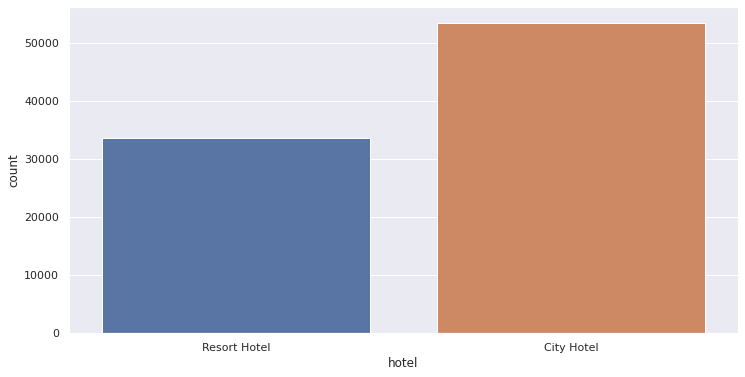

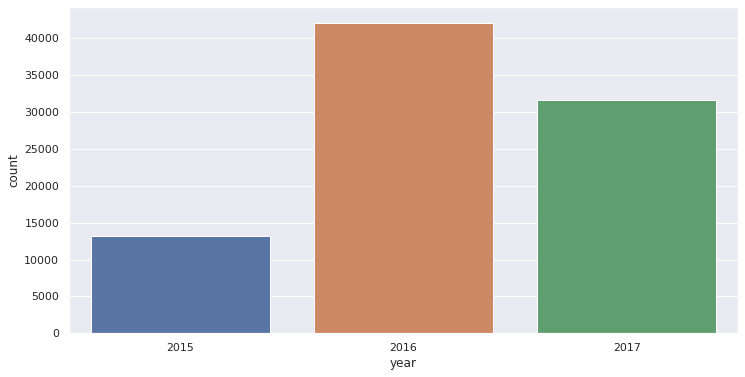

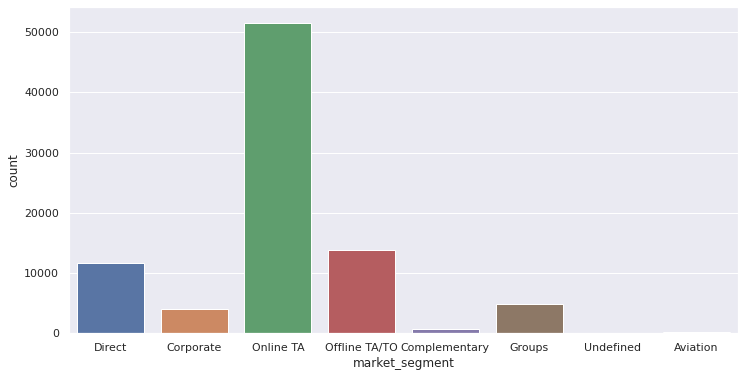

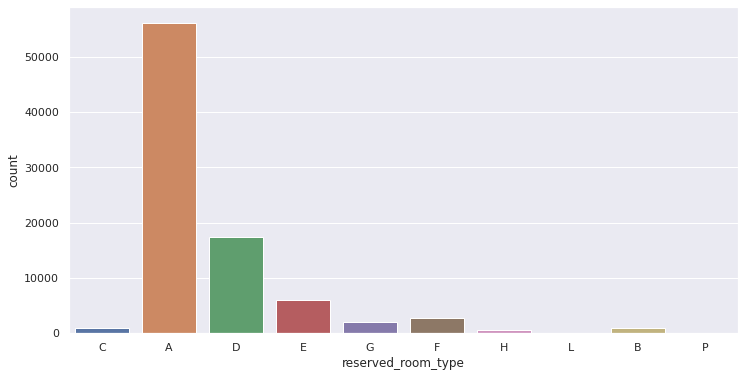

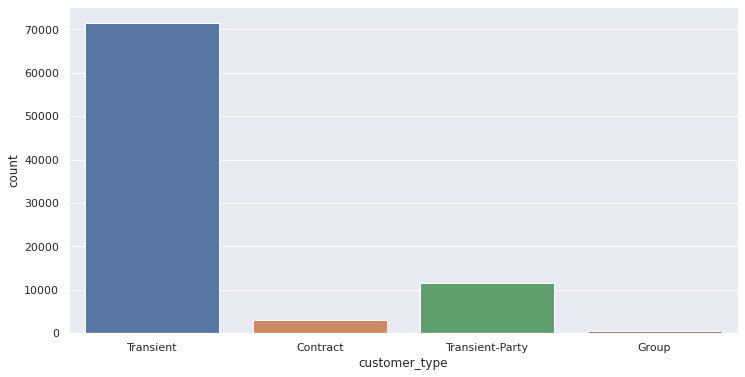

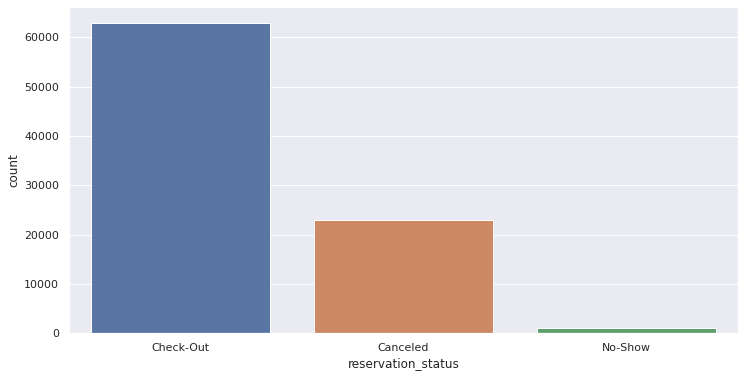

In [41]:
cols_for_uni = ['hotel', 'year', 'market_segment', 'reserved_room_type', 'customer_type', 'reservation_status']

for col in cols_for_uni:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[col], x= col, ax= ax)
  plt.show()

**Some insights from the above**

**Cancelations**: It can be seen that there are significant amount of cancelations across both hotels. Cancelations might be seen as aberrations, but it is clear from our data that the hotels may need to be ready for such occurances. The hotels can take insights from the data to understand what kind of customer is likely to cancel their bookings, and in turn make better marketing strategies.

**Segment**: The largest segment is the Online TA. The hotels can do more to attract other segments as well. Also, we can check during our bivariate analysis for the segments from which we have the least cancelations and also the segment from which the hotels get repeat customers.

**Number of bookings**: The city hotel was booked more than the resort hotel

**Bookings over the years**: The data has been collected for 3 years. There is a steep rise in bookings between 2015 and 2016 and then a drop between 2016 and 2017. This kind of fluctuation may not be normal. This needs to be further investigated


**Due to the anomaly seen in the trend of bookings over the years, we would like to check the months for which the data was collected for each of the years**

In [42]:
# Checking the months for which the data was collected for each year

df.groupby('year')['month'].unique()

year
2015                      [7, 8, 9, 10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                   [1, 2, 3, 4, 5, 6, 7, 8]
Name: month, dtype: object

Hence, we can see that only 6 months of data was collected in 2015 and only 8 months of data was collected in 2017. Data collected started only in July, 2015 and ended in August, 2017.

This finding is very significant as many of the analysis, such as the most popular month for booking either hotel, will lose significance. The only common months across the three years of data are July and August.

# Bivariate Analysis

Having gone through some univariate analysis, it seems necessary that we check out some significant connections between the various parameters we have got. Needless to say, we have to go for bivariate analysis for the same

In [43]:
df.columns

Index(['hotel', 'lead_time', 'year', 'month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel', 'repeated_guest',
       'previous_cancellations', 'previous_stays', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'car_parks_required',
       'special_requests', 'reservation_status', 'reservation_status_date',
       'date', 'kids'],
      dtype='object')

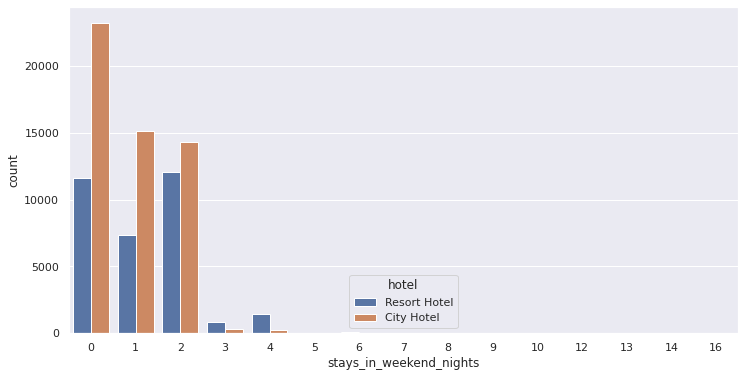

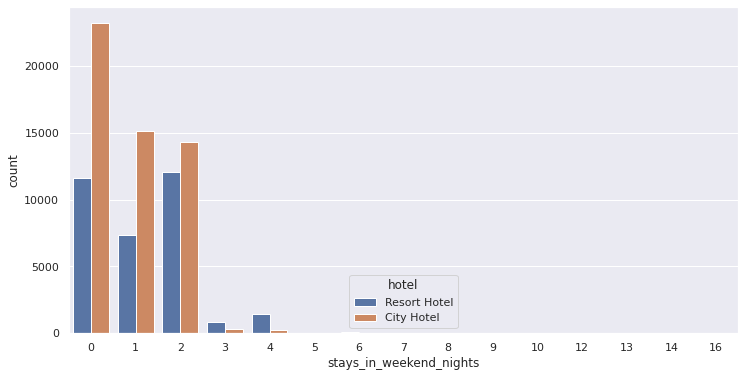

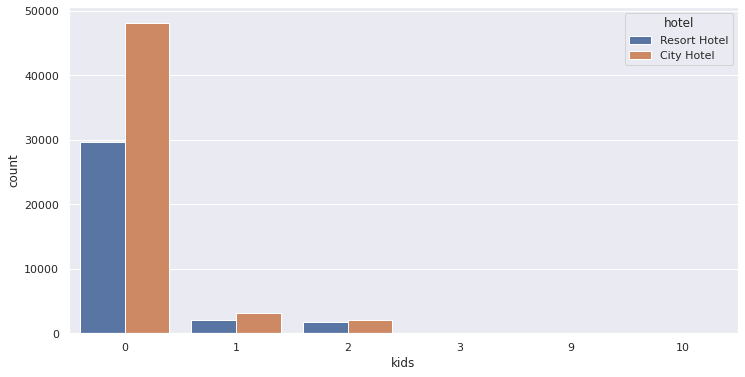

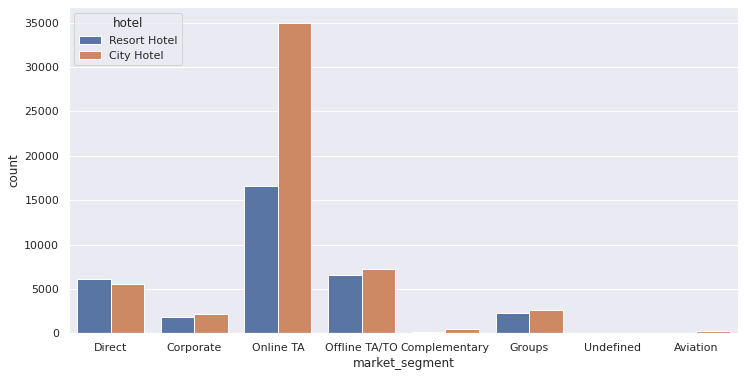

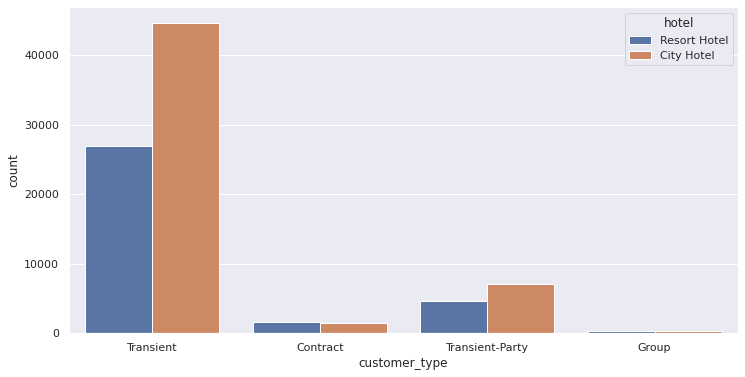

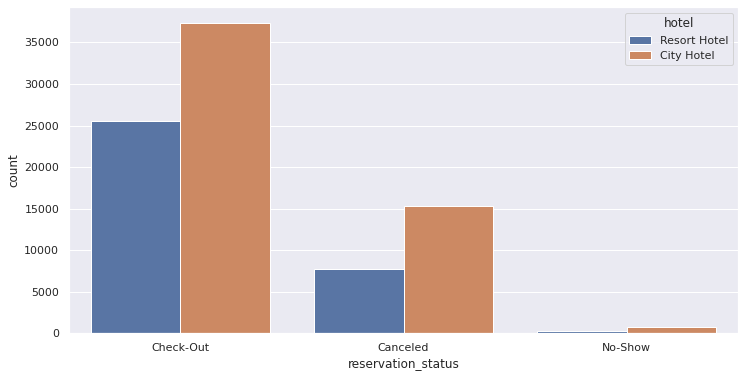

In [44]:
# We must figure out some important columns that we can analyse with the hotel type

cols_for_biv = ['stays_in_weekend_nights', 'stays_in_weekend_nights', 'kids', 'market_segment', 'customer_type', 'reservation_status']

for col in cols_for_biv:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[col], x= col, hue=df['hotel'], ax= ax)
  plt.show()

**Some insights from the above**

**Duration of stay**: It can be seen for both hotels that the stay over weekends and even during the weekdays is higher for city hotel. Which is expected because the city hotel has more footfalls than the resort hotel in the first place. However, what is interesting is that the resort hotel has more stays as the duration of the stay increases. Which signifies that people preferred resort over the city hotel when it came to longer duration stays.

**Kids**: The difference in the number of people without kids staying in city hotel is a lot higher than those staying in the resort hotel. This difference seems to drop as people have more kids. Which might point towards a growing preference for resort hotel among people with children

**Market segment**: The city hotel caters to a lot of people from the online TA segment, which again is not surprising given the overall more footfalls in the city hotel. But whats interesting to note that the resort hotel has almost the same number of customers from all the other segments as the city hotel. Which means that the high footfall in the city hotel is mainly caused by the online TA segment alone.


**Lets check the proportion of repeated guests for both the hotels**



In [45]:
df_rep_guest = df.groupby('market_segment')['repeated_guest'].value_counts().unstack()
df_rep_guest

repeated_guest,0,1
market_segment,,
Aviation,164.0,63.0
Complementary,474.0,224.0
Corporate,2587.0,1444.0
Direct,10872.0,776.0
Groups,4880.0,57.0
Offline TA/TO,13588.0,269.0
Online TA,50966.0,578.0
Undefined,2.0,NaN


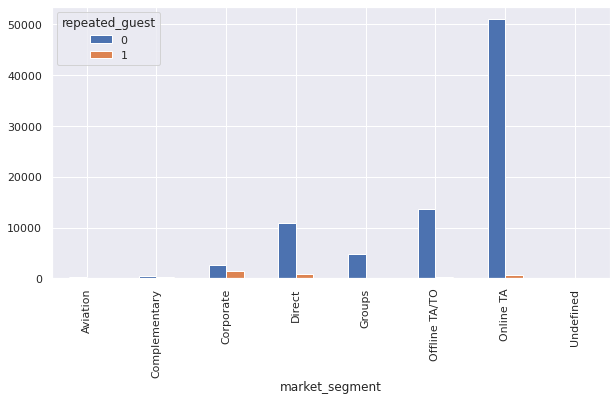

In [46]:
df_rep_guest.plot(kind = 'bar', figsize = (10,5))

The highest proportion of repeated guest is from the complimentary segment, however the guests from this segment are very few

Second highest proportion of repeated guests is from the Corporate segment. This could be because people returning to the same place for their work purposes.

**Cancelations**

We have already seen above during the univariate analysis that there are many cancelations. We can check which segment amounts for most cancelations.

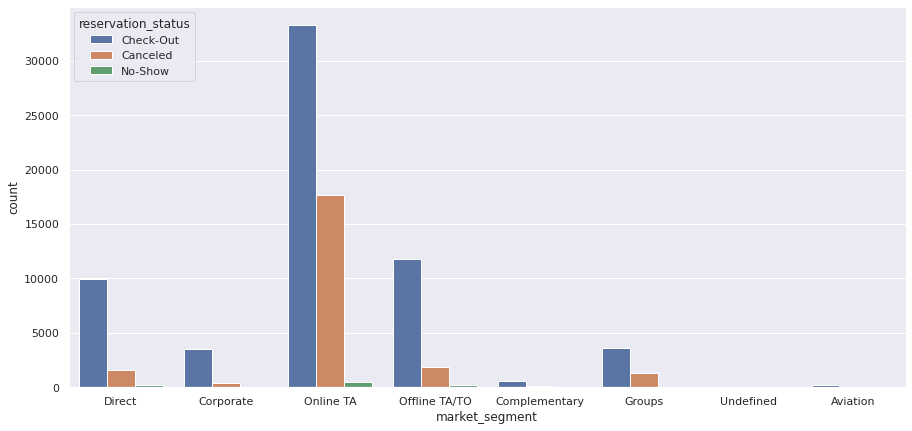

In [47]:
fig= plt.figure(figsize=(15,7))
sns.countplot(x = 'market_segment', data = df, hue = 'reservation_status')

Above, we can see that the cancelations are almost half of that of those booking that were not canceled in the Online Travel Agent segment. Hence, this segment amounts to the highest proportion of cancelations. All the other segments have relatively lesser cancelations.

The hotels might want to come up with stricter booking criteria for online TA's, in order to filter out non-serious travelers.

We have made the relevant conclusions at relevant places. However it is pertinent to note that the data is of a very limited period and for just two hotels. So these analysis do not paint a general picture. These observations could be limited to these hotels only given their own special characteristics.